# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#create empty lists for weather data
city_name =[]
lat=[]
lng=[]
cloudiness=[]
countries=[]
date=[]
humidity=[]
speed=[]
temp_max=[]

record = 1
print(len(cities))
print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    #print(f"Processing Record {record}|{city_record}")
        
    response = requests.get(query_url + city).json()
    print(f"{query_url}&q={city}")
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        speed.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        
       
        
        record = record + 1
        
    except:
        print(f"City {city} not found. Skipping...")
    #continue
    
    
    
print(f"------------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------------")



602
Beginning Data Retrieval
------------------------
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=lubao
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=butaritari
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=kassala
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=mandan
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=avarua
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=canton
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=tulagi
City tulagi not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=phagwara
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=matagami
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=ozimek
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=77d7b2

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=general roca
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=nkhata bay
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sambava
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=broome
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=korla
City korla not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=oda
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=caarapo
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=toora-khem
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=erzin
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=dogbo
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=kaka
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=bargal
City bargal not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=santana do mundau
http://api.openweathermap.org/data/2.5/weather?appid=77d7b2

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=luderitz
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=ust-tsilma
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sibolga
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=igarka
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=hirara
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=touros
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=yatou
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=camabatela
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=linden
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=broken hill
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=andra
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=baijiantan
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=dunedin
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metri

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=san fernando
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=ranfurly
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=utiroa
City utiroa not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sistranda
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sergeyevka
http://api.openweathermap.org/data/2.5/weather?appid=7

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sentyabrskiy
City sentyabrskiy not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sangin
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=tevriz
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=along
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=sereflikochisar
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=marawi
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=kindu
http://api.openweathermap.org/data/2.5/weather?appid=77d

http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=mailsi
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=dicabisagan
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=mayo
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=maracacume
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=luena
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=&q=vigrestad
http://api.openweathermap.org/data/2.5/weather?appid=77d7b29a377c1c34254d1670ca7e2d81&units=metric&q=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
# create a data frame 
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": date,
    "Humidity": humidity,
    "Windspeed": speed,
    "Max temp": temp_max
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()



,city,lat,lng,Cloudiness,Country,Date,Humidity,Windspeed,Max temp
0,Punta Arenas,-53.16,-70.91,75,CL,1566659990,100,2.60,6.00
1,Lubao,-5.39,25.75,27,CD,1566659991,17,1.87,35.52
2,Butaritari,3.07,172.79,56,KI,1566659991,73,2.62,28.72
3,Kassala,15.45,36.38,61,SD,1566659744,49,3.31,31.52
4,Carnarvon,-30.97,22.13,0,ZA,1566659939,12,8.75,24.12


In [46]:
#Export dataframe to CSV
weather_data.to_csv( "weather_py.csv")

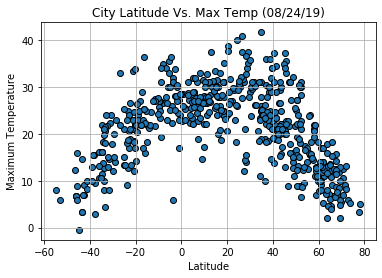

In [41]:
#define data - Latitude Vs Temp
x1 = weather_data['lat']
y1 = weather_data['Max temp']


plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title('City Latitude Vs. Max Temp (08/24/19)')


plt.scatter(x1, y1, marker='o', alpha=1, edgecolors='black')

plt.grid(True)
# plt.savefig("C:\\Users\\taiwo\\OneDrive\\Desktop\\Working\\02-Homework\\06-Python-APIs\\Instructions\\starter_code\\Temp.png")

plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

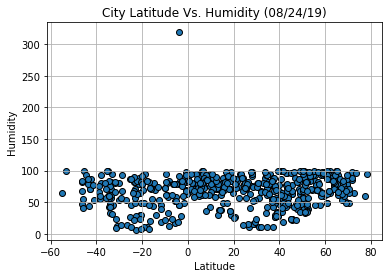

In [42]:
#define data - Latitude Vs Humidity
x1 = weather_data['lat']
y1 = weather_data['Humidity']


plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City Latitude Vs. Humidity (08/24/19)')


plt.scatter(x1, y1, marker='o', alpha=1, edgecolors='black')

plt.grid(True)
# plt.savefig("C:\\Users\\taiwo\\OneDrive\\Desktop\\Working\\02-Homework\\06-Python-APIs\\Instructions\\starter_code\\Humidity.png")
plt.show()

#### Latitude vs. Humidity Plot

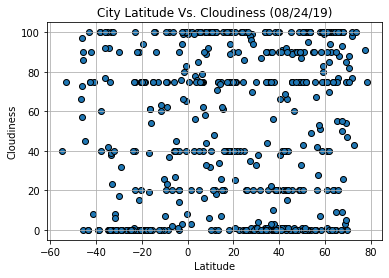

In [43]:
#define data - Latitude Vs Cloudiness
x1 = weather_data['lat']
y1 = weather_data['Cloudiness']


plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('City Latitude Vs. Cloudiness (08/24/19)')


plt.scatter(x1, y1, marker='o', alpha=1, edgecolors='black')

plt.grid(True)
# plt.savefig("C:\\Users\\taiwo\\OneDrive\\Desktop\\Working\\02-Homework\\06-Python-APIs\\Instructions\\starter_code\\Cloudiness.png")
plt.show()

#### Latitude vs. Cloudiness Plot

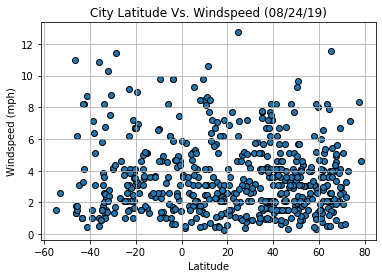

In [44]:
#define data - Latitude Vs Wind Speed
x1 = weather_data['lat']
y1 = weather_data['Windspeed']


plt.ylabel('Windspeed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude Vs. Windspeed (08/24/19)')


plt.scatter(x1, y1, marker='o', alpha=1, edgecolors='black')

plt.grid(True)
# plt.savefig("C:\\Users\\taiwo\\OneDrive\\Desktop\\Working\\02-Homework\\06-Python-APIs\\Instructions\\starter_code\\Windspeed.png")
plt.show()

#### Latitude vs. Wind Speed Plot

#OBSERVABLE TRENDS
#1. No city in the range exceeds 40 as maximum temperature
#2. Only One city in the range is an outlier with an exceptional humidity above 300
#3. Maximum cloudiness for all cities in the range is 100
